In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FormatStrFormatter
import random


In [2]:

"""
Returns a dictionary of a list of dataframes for the corresponding maptype
"""
def separateData(folderPath:str,column:str):
    strsKrys=[]
    strsOG=[]
    strsPC=[]
    strsHopper=[]
    for mapName in ["Krys","Original","PatternCount","Hopper"]:
        if mapName=="Original":
            for i in range(15):
                strsOG.append(mapName+str(i))
        else:
            for i in range(100):
                if mapName=="Krys":
                    strsKrys.append(mapName+str(i))      
                elif mapName=="PatternCount":
                    strsPC.append(mapName+str(i))
                elif mapName=="Hopper":
                    strsHopper.append(mapName+str(i))

    dfKrys=pd.DataFrame(columns=strsKrys)
    dfOG=pd.DataFrame(columns=strsOG)
    dfPC=pd.DataFrame(columns=strsPC)
    dfHopper=pd.DataFrame(columns=strsHopper)

    dataframeDict={
        "Krys":dfKrys,
        "Original":dfOG,
        "PatternCount":dfPC,
        "Hopper":dfHopper
    }
    for fName in os.listdir(folderPath):
        path:str = os.path.join(folderPath,fName)
        if not os.path.isfile(path):
            continue
        dataframe=pd.read_csv(path,header=2)
        if fName.find("krys")!=-1:
            dataframeDict["Krys"].loc[len(dataframeDict["Krys"])]=dataframe[:100][column].tolist()
        elif fName.find("original")!=-1:
            dataframeDict["Original"].loc[len(dataframeDict["Original"])]=dataframe[:15][column].tolist()
        elif fName.find("patternCount")!=-1:
            dataframeDict["PatternCount"].loc[len(dataframeDict["PatternCount"])]=dataframe[:100][column].tolist()
        elif fName.find("hopper")!=-1:
            dataframeDict["Hopper"].loc[len(dataframeDict["Hopper"])]=dataframe[:100][column].tolist()
    return dataframeDict

def createParamFrame(folderPath):
    df=None
    for fName in os.listdir(folderPath):
        path:str = os.path.join(folderPath,fName)
        if not os.path.isfile(path):
            continue

        file=open(path,"r")
        #Getting 1st parameter
        line1=file.readline()
        paramName1,paramVal1=getParam(line1)
        #Getting 2nd parameter
        line2=file.readline()
        paramName2,paramVal2=getParam(line2)
        if df is None:
            df=pd.DataFrame(columns=[paramName1,paramName2])
        if not ((df[paramName1] == paramVal1) & (df[paramName2] == paramVal2)).any():
            df.loc[len(df)]=[paramVal1,paramVal2]
    return df

def getParam(paramStr:str):
    semicol_index=paramStr.find(":")
    paramName=paramStr[:semicol_index]
    paramVal=float(paramStr[semicol_index+1:])
    return paramName,paramVal

## Runtimes

In [3]:

dictPath="../astar/"

pc=createParamFrame(dictPath)
mapRuntimeData=separateData(dictPath,"run time")
mapRuntimeData["PatternCount"].tail()
KrysData=pc.join(mapRuntimeData["Krys"])
OriginalData=pc.join(mapRuntimeData["Original"])
PCData=pc.join(mapRuntimeData["PatternCount"])

KrysData["MEAN"]=KrysData.iloc[:,2:102].mean(axis=1)
OriginalData["MEAN"]=OriginalData.iloc[:,2:17].mean(axis=1)
PCData["MEAN"]=PCData.iloc[:,2:102].mean(axis=1)

PCData.loc[100:]

,ST,TTFW,PatternCount0,PatternCount1,PatternCount2,PatternCount3,PatternCount4,PatternCount5,PatternCount6,PatternCount7,...,PatternCount91,PatternCount92,PatternCount93,PatternCount94,PatternCount95,PatternCount96,PatternCount97,PatternCount98,PatternCount99,MEAN


<Axes: title={'center': 'PatternCount levels'}, xlabel='TTFW', ylabel='ST'>

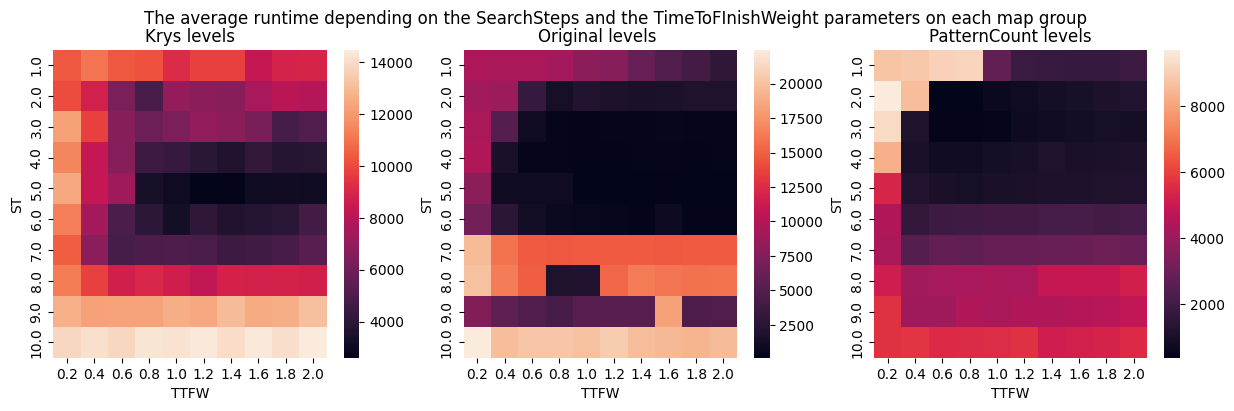

In [4]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
fig.suptitle("The average runtime depending on the SearchSteps and the TimeToFInishWeight parameters on each map group")

axs[0].set_title("Krys levels")
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=KrysData.pivot(index="ST",columns="TTFW",values="MEAN")
sns.heatmap(ax=axs[0],data=heatmapDF)

axs[1].set_title("Original levels ")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=OriginalData.pivot(index="ST",columns="TTFW",values="MEAN")
sns.heatmap(ax=axs[1],data=heatmapDF)

axs[2].set_title("PatternCount levels")
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=PCData.pivot(index="ST",columns="TTFW",values="MEAN")
sns.heatmap(ax=axs[2],data=heatmapDF)

In [5]:
WFData=separateData(dictPath,"win/fail")
WFData["PatternCount"].tail()
KrysDataWF=pc.join(WFData["Krys"])
OriginalDataWF=pc.join(WFData["Original"])
PCDataWF=pc.join(WFData["PatternCount"])

## Win percentage

In [6]:
KrysDataWF["WIN %"]=KrysDataWF.iloc[:,2:102].sum(axis=1)
#KrysDataWF["WIN %"]=KrysDataWF.iloc[:,-1]/15*100

OriginalDataWF["SUM"]=OriginalDataWF.iloc[:,2:17].sum(axis=1)
OriginalDataWF["WIN %"]=OriginalDataWF.iloc[:,-1]/15*100

PCDataWF["WIN %"]=PCDataWF.iloc[:,2:102].sum(axis=1)
#PCDataWF["WIN %"]=PCDataWF.iloc[:,-1]/15*100

PCDataWF.head()


,ST,TTFW,PatternCount0,PatternCount1,PatternCount2,PatternCount3,PatternCount4,PatternCount5,PatternCount6,PatternCount7,...,PatternCount91,PatternCount92,PatternCount93,PatternCount94,PatternCount95,PatternCount96,PatternCount97,PatternCount98,PatternCount99,WIN %
0,1.0,0.2,False,True,True,True,False,True,True,False,...,True,False,True,False,False,False,True,True,False,62
1,1.0,0.4,False,True,False,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,64
2,1.0,0.6,False,False,False,False,False,True,True,True,...,True,False,True,True,False,False,True,True,True,76
3,1.0,0.8,False,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,87
4,1.0,1.0,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,95


<Axes: title={'center': 'PatternCount level '}, xlabel='TTFW', ylabel='ST'>

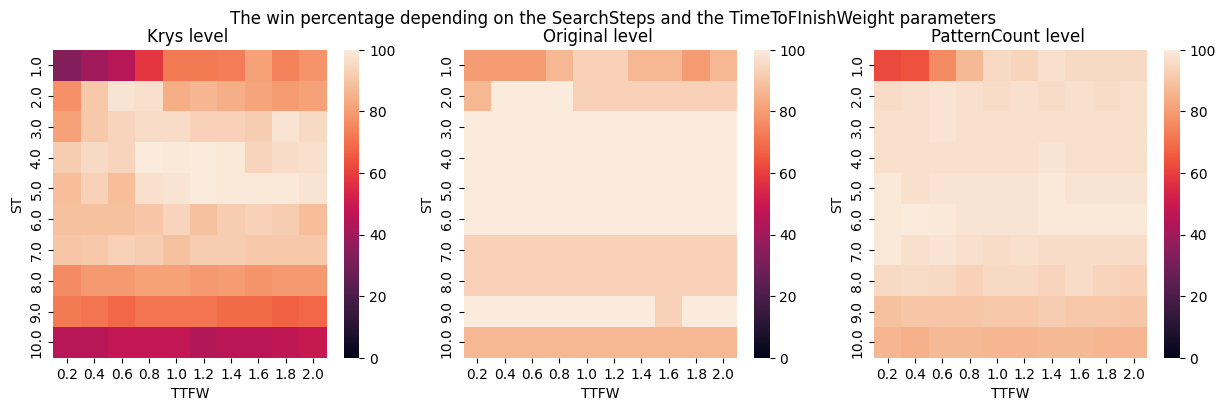

In [7]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
fig.suptitle("The win percentage depending on the SearchSteps and the TimeToFInishWeight parameters ")

axs[0].set_title("Krys level ")
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=KrysDataWF.pivot(index="ST",columns="TTFW",values="WIN %")
sns.heatmap(ax=axs[0],data=heatmapDF, vmin=0,vmax=100)

axs[1].set_title("Original level ")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=OriginalDataWF.pivot(index="ST",columns="TTFW",values="WIN %")
sns.heatmap(ax=axs[1],data=heatmapDF,vmin=0,vmax=100)

axs[2].set_title("PatternCount level ")
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=PCDataWF.pivot(index="ST",columns="TTFW",values="WIN %")
sns.heatmap(ax=axs[2],data=heatmapDF,vmin=0,vmax=100)

Based on the two experiments, we can find the optimal parameters for the search steps, and the TimeToFinishWeight. We can see that the runtime was high when the search steps are either low(from 1-3), or high(8-10). In the first case probably what happens, is that the agent does not find the solution as fast. And in the second case, the agent takes too many search steps, which wastes time.  
  
It can be seen that the optimal parameters are for the SearchSteps are between 4 to 7, and for the TimeToFinishWeight it is somewhere between 1 and 2.

# Test2

In the second case I tested the astarWindow agent, with different window sizes, and thinking times. The thinking times are  
going from 1 second to 141, and the window sizes go from 20 to 300. 

## Runtimes

In [8]:
dictPath="../astarWindow/"

pc=createParamFrame(dictPath)
mapRuntimeData2=separateData(dictPath,"run time")
KrysDataRT=pc.join(mapRuntimeData2["Krys"])
OriginalDataRT=pc.join(mapRuntimeData2["Original"])
HopperDataRT=pc.join(mapRuntimeData2["Hopper"])

KrysDataRT["MEAN"]=KrysDataRT.iloc[:,2:102].mean(axis=1)
OriginalDataRT["MEAN"]=OriginalDataRT.iloc[:,2:17].mean(axis=1)
HopperDataRT["MEAN"]=HopperDataRT.iloc[:,2:102].mean(axis=1)

pc.head()


,WO,MT
0,100.0,1.0
1,100.0,101.0
2,100.0,11.0
3,100.0,111.0
4,100.0,121.0


<Axes: title={'center': 'Hopper levels'}, xlabel='MT', ylabel='WO'>

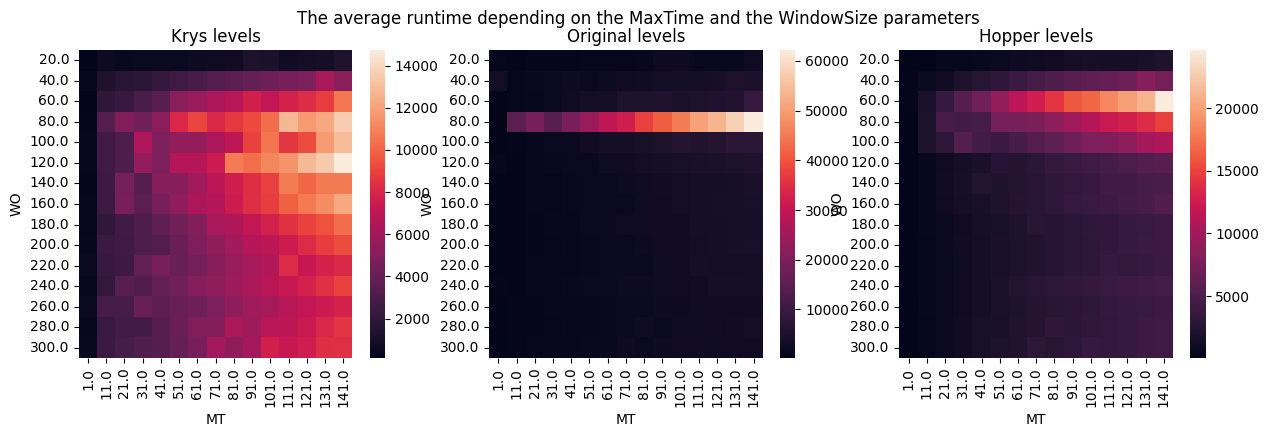

In [9]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
fig.suptitle("The average runtime depending on the MaxTime and the WindowSize parameters ")

axs[0].set_title("Krys levels")
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=KrysDataRT.pivot(index="WO",columns="MT",values="MEAN")
sns.heatmap(ax=axs[0],data=heatmapDF)

axs[1].set_title("Original levels")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=OriginalDataRT.pivot(index="WO",columns="MT",values="MEAN")
sns.heatmap(ax=axs[1],data=heatmapDF)

axs[2].set_title("Hopper levels")
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=HopperDataRT.pivot(index="WO",columns="MT",values="MEAN")
sns.heatmap(ax=axs[2],data=heatmapDF)

## Win percentage

In [10]:
mapWFData2=separateData(dictPath,"win/fail")
KrysDataWF2=pc.join(mapWFData2["Krys"])
OriginalDataWF2=pc.join(mapWFData2["Original"])
HopperDataWF2=pc.join(mapWFData2["Hopper"])

In [11]:
KrysDataWF2["WIN %"]=KrysDataWF2.iloc[:,2:102].sum(axis=1)
#KrysDataWF["WIN %"]=KrysDataWF.iloc[:,-1]

OriginalDataWF2["SUM"]=OriginalDataWF2.iloc[:,2:17].sum(axis=1)
OriginalDataWF2["WIN %"]=OriginalDataWF2.iloc[:,-1]/15*100

HopperDataWF2["WIN %"]=HopperDataWF2.iloc[:,2:102].sum(axis=1)
#HopperDataWF["WIN %"]=HopperDataWF.iloc[:,-1]/15*100

In [12]:
OriginalDataWF.head()

,ST,TTFW,Original0,Original1,Original2,Original3,Original4,Original5,Original6,Original7,Original8,Original9,Original10,Original11,Original12,Original13,Original14,SUM,WIN %
0,1.0,0.2,True,True,True,True,True,False,True,True,True,False,True,True,False,True,True,12,80.000000
1,1.0,0.4,True,True,False,True,True,False,True,True,True,True,True,True,False,True,True,12,80.000000
2,1.0,0.6,True,True,False,True,True,False,True,True,True,True,True,True,False,True,True,12,80.000000
3,1.0,0.8,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,13,86.666667
4,1.0,1.0,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,14,93.333333


<Axes: title={'center': 'Hopper levels'}, xlabel='MT', ylabel='WO'>

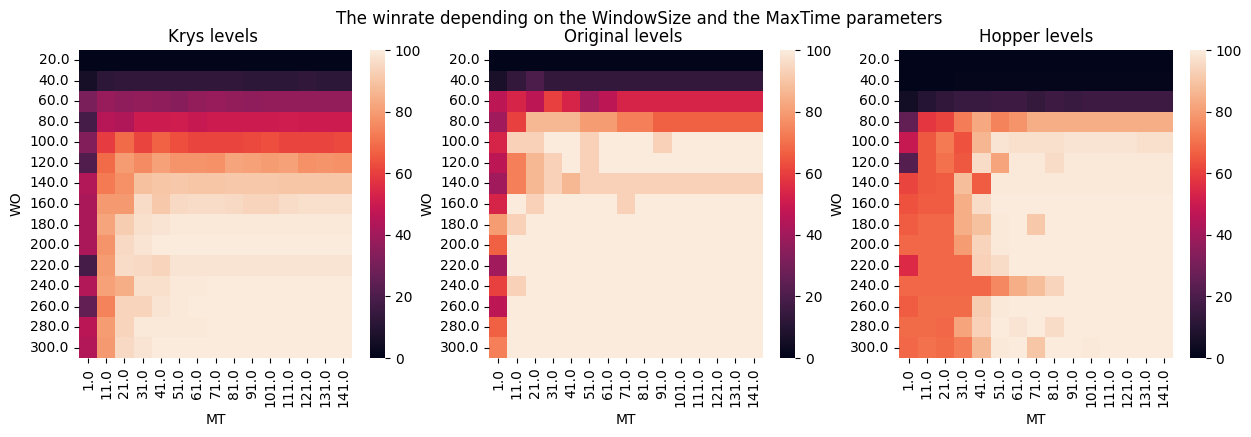

In [13]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
fig.suptitle("The winrate depending on the WindowSize and the MaxTime parameters ")

axs[0].set_title("Krys levels ")
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=KrysDataWF2.pivot(index="WO",columns="MT",values="WIN %")
sns.heatmap(ax=axs[0],data=heatmapDF)

axs[1].set_title("Original levels ")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=OriginalDataWF2.pivot(index="WO",columns="MT",values="WIN %")
sns.heatmap(ax=axs[1],data=heatmapDF)

axs[2].set_title("Hopper levels")
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

heatmapDF=HopperDataWF2.pivot(index="WO",columns="MT",values="WIN %")
sns.heatmap(ax=axs[2],data=heatmapDF)

Looking at the runtime experiments, the agent was finishing fast either because the thinking time was low, or it found a solution quickly(in case of the hopper and original maps).  
  
In the case of the winrate experiments, a really obvious pattern appears. Basically, as the window size and the thinking time grows, the win percentage gets higher and higher. From this it is possible to find a minimum for these values that still works for each of the map groups.  
  
Comparing the two experiments, we can conclude in which cases the agent's runtime was fast bacause it won, or because it had a low thinking time, and did not win.